In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# This dataset contains 3095 patients with Hypertension

In [5]:
data = pd.read_csv("../data/medications.zip", compression='zip')


In [6]:
types = data[['PATIENT', 'CODE', 'DESCRIPTION', 'ENCOUNTER']]

In [7]:
category_group = types.groupby(['PATIENT', 'CODE'])

In [8]:
medication_code = ['314076', '310798', '308136']

In [9]:
patient_list = data[data.CODE.isin(medication_code)]
patient_dup = patient_list[['PATIENT', 'CODE', 'ENCOUNTER']].drop_duplicates(keep=False)
patients = pd.DataFrame(patient_dup)
group = patients.groupby([patients.PATIENT.tolist()],as_index=False).size().reset_index().\
    rename(columns={0:'Therapy Count'})
group

,index,Therapy Count
0,00022a9e-d5ba-4aae-9656-faedd47f967d,50
1,000e3181-56f9-4cb7-a66e-53dff6ce74d2,75
2,0011b80e-1f33-40a0-b347-17c815ac05d6,57
3,002f1212-45d9-452d-9a2c-feba3430ae15,18
4,00469d4d-3abb-4731-8a96-811bf8e71e98,12
...,...,...
3090,ff7aae4c-317a-47f6-b6cc-e0903097ca97,86
3091,ffa72011-77de-40df-accf-b993213aa30d,4
3092,ffc84420-189d-4032-b9ea-1ad09c5744e0,90
3093,ffe7386b-59d1-47c3-9862-5b6a90fa1661,56


### The above number confirms that there are still 3095 patients who are on hypertension medication

In [10]:
medication_list = patients.groupby([patients.PATIENT.tolist(), 'CODE'],as_index=False).size().reset_index()
medication_list

,level_0,CODE,0
0,00022a9e-d5ba-4aae-9656-faedd47f967d,308136,25
1,00022a9e-d5ba-4aae-9656-faedd47f967d,310798,25
2,000e3181-56f9-4cb7-a66e-53dff6ce74d2,310798,75
3,0011b80e-1f33-40a0-b347-17c815ac05d6,314076,57
4,002f1212-45d9-452d-9a2c-feba3430ae15,310798,9
...,...,...,...
5760,ffc84420-189d-4032-b9ea-1ad09c5744e0,310798,30
5761,ffc84420-189d-4032-b9ea-1ad09c5744e0,314076,30
5762,ffe7386b-59d1-47c3-9862-5b6a90fa1661,314076,56
5763,fff29d24-68ae-4290-bed4-f204f4800a4b,310798,14


In [11]:
therapy = medication_list.groupby(medication_list.level_0.tolist(),as_index=False).size().reset_index().\
    rename(columns={0:'records'})

In [12]:
num_therapy = therapy['records'].value_counts()
label_therapy = ['Dual-', 'Mono-', 'Tri-']
num_therapy

2    1186
1    1167
3     742
Name: records, dtype: int64

In [13]:
num_therapy.sum()

3095

Text(0.5, 1.0, 'Therapy')

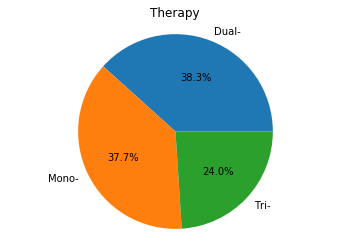

In [14]:
fig, ax = plt.subplots()
ax.pie(num_therapy, labels=label_therapy, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Therapy')

# This dataset contains 3253 patients

In [16]:
data2 = pd.read_csv("../data/medications2.zip", compression='zip')

In [17]:
types2 = data2[['PATIENT', 'CODE', 'DESCRIPTION', 'ENCOUNTER']]

In [18]:
medication_code2 = ['314076', '310798', '308136']

In [19]:
patient_list2 = data2[data2.CODE.isin(medication_code2)]
patient_dup2 = patient_list2[['PATIENT', 'CODE', 'ENCOUNTER']].drop_duplicates(keep=False)
patients2 = pd.DataFrame(patient_dup2)
group2 = patients2.groupby([patients2.PATIENT.tolist()],as_index=False).size().reset_index().\
    rename(columns={0:'Therapy Count'})
group2

,index,Therapy Count
0,001c1d08-e3a2-4fad-809f-56a1dfd2d51e,37
1,00504e2a-2c82-4bf1-9ffc-de57411723b3,381
2,0050ebad-8114-4fe0-b2ed-91928e7c0232,60
3,00586d27-152d-46eb-a1be-27a034566fd5,29
4,0063ef81-28d3-4257-9ab3-5309e8e4ff52,87
...,...,...
3248,ffc0703c-308e-490d-8d59-536e44c67300,120
3249,ffc40ed1-b96c-4841-945d-7bf740539618,24
3250,ffd02a75-4cb5-40dc-bd52-778977d6f701,77
3251,ffe25ab2-729e-4b08-a6e3-9745aff8a7a3,127


In [20]:
medication_list2 = patients2.groupby([patients2.PATIENT.tolist(), 'CODE'],as_index=False).size().reset_index()
medication_list2

,level_0,CODE,0
0,001c1d08-e3a2-4fad-809f-56a1dfd2d51e,310798,37
1,00504e2a-2c82-4bf1-9ffc-de57411723b3,314076,381
2,0050ebad-8114-4fe0-b2ed-91928e7c0232,310798,60
3,00586d27-152d-46eb-a1be-27a034566fd5,308136,29
4,0063ef81-28d3-4257-9ab3-5309e8e4ff52,308136,29
...,...,...,...
6054,ffc40ed1-b96c-4841-945d-7bf740539618,308136,12
6055,ffc40ed1-b96c-4841-945d-7bf740539618,314076,12
6056,ffd02a75-4cb5-40dc-bd52-778977d6f701,308136,77
6057,ffe25ab2-729e-4b08-a6e3-9745aff8a7a3,310798,127


In [21]:
therapy2 = medication_list2.groupby(medication_list2.level_0.tolist(),as_index=False).size().reset_index().\
    rename(columns={0:'records'})

In [22]:
num_therapy2 = therapy2['records'].value_counts()
label_therapy2 = ['Dual-', 'Mono-', 'Tri-']
num_therapy2

2    1282
1    1209
3     762
Name: records, dtype: int64

In [23]:
num_therapy2.sum()

3253

Text(0.5, 1.0, 'Therapy')

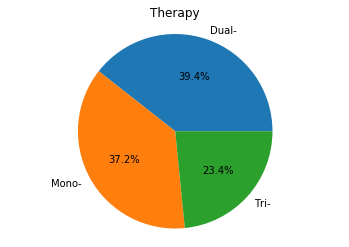

In [24]:
fig, ax = plt.subplots()
ax.pie(num_therapy2, labels=label_therapy2, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Therapy')